In [27]:
library(tidyverse)
library(pheatmap)

In [28]:
files_hic <- c(
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping/egg1.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping/egg2.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping/emb1.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping/emb2.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping/nym1.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping/nym2.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping/pvs1.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping/pvs2.sorted.counts.tsv"
    )
files_vb <- c(
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping_VB/egg1.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping_VB/egg2.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping_VB/emb1.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping_VB/emb2.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping_VB/nym1.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping_VB/nym2.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping_VB/pvs1.sorted.counts.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/mapping_VB/pvs2.sorted.counts.tsv"
    )

In [29]:
samples <- c()

readfmt <- function(x){
    sample <- str_split(x, "/")
    sample <- sample[[1]][length(sample[[1]])]
    sample <- str_replace(sample, ".sorted.counts.tsv", "")
    samples <- c(samples, sample)
    read_tsv(x, col_names = FALSE) %>% mutate(label=sample)
}

hic <- lapply(files_hic, readfmt)
vb <- lapply(files_vb, readfmt)



hic <- bind_rows(hic) %>% mutate(genome="HiC")
vb <- bind_rows(vb) %>% mutate(genome="VectorBase")

all <- bind_rows(vb, hic)

# vb <- lapply(files_vb, function(x){read_tsv(x, col_names = FALSE)}) %>% suppressMessages()

Rows: 3 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this mess

In [30]:
all

X1,X2,label,genome
<chr>,<dbl>,<chr>,<chr>
total,9219560,egg1,VectorBase
unique,5043791,egg1,VectorBase
multi,4175769,egg1,VectorBase
total,10202002,egg2,VectorBase
unique,5396028,egg2,VectorBase
multi,4805974,egg2,VectorBase
total,33723248,emb1,VectorBase
unique,16585438,emb1,VectorBase
multi,17137810,emb1,VectorBase


In [31]:
ph_hic <- hic %>% pivot_wider(names_from = label, values_from = X2) %>% column_to_rownames("X1")


In [32]:
pheatmap(ph_hic)

Warning message in dist(mat, method = distance):
“NAs introduced by coercion”
Warning message in dist(mat, method = distance):
“NAs introduced by coercion”


ERROR: Error in hclust(d, method = method): NA/NaN/Inf in foreign function call (arg 10)


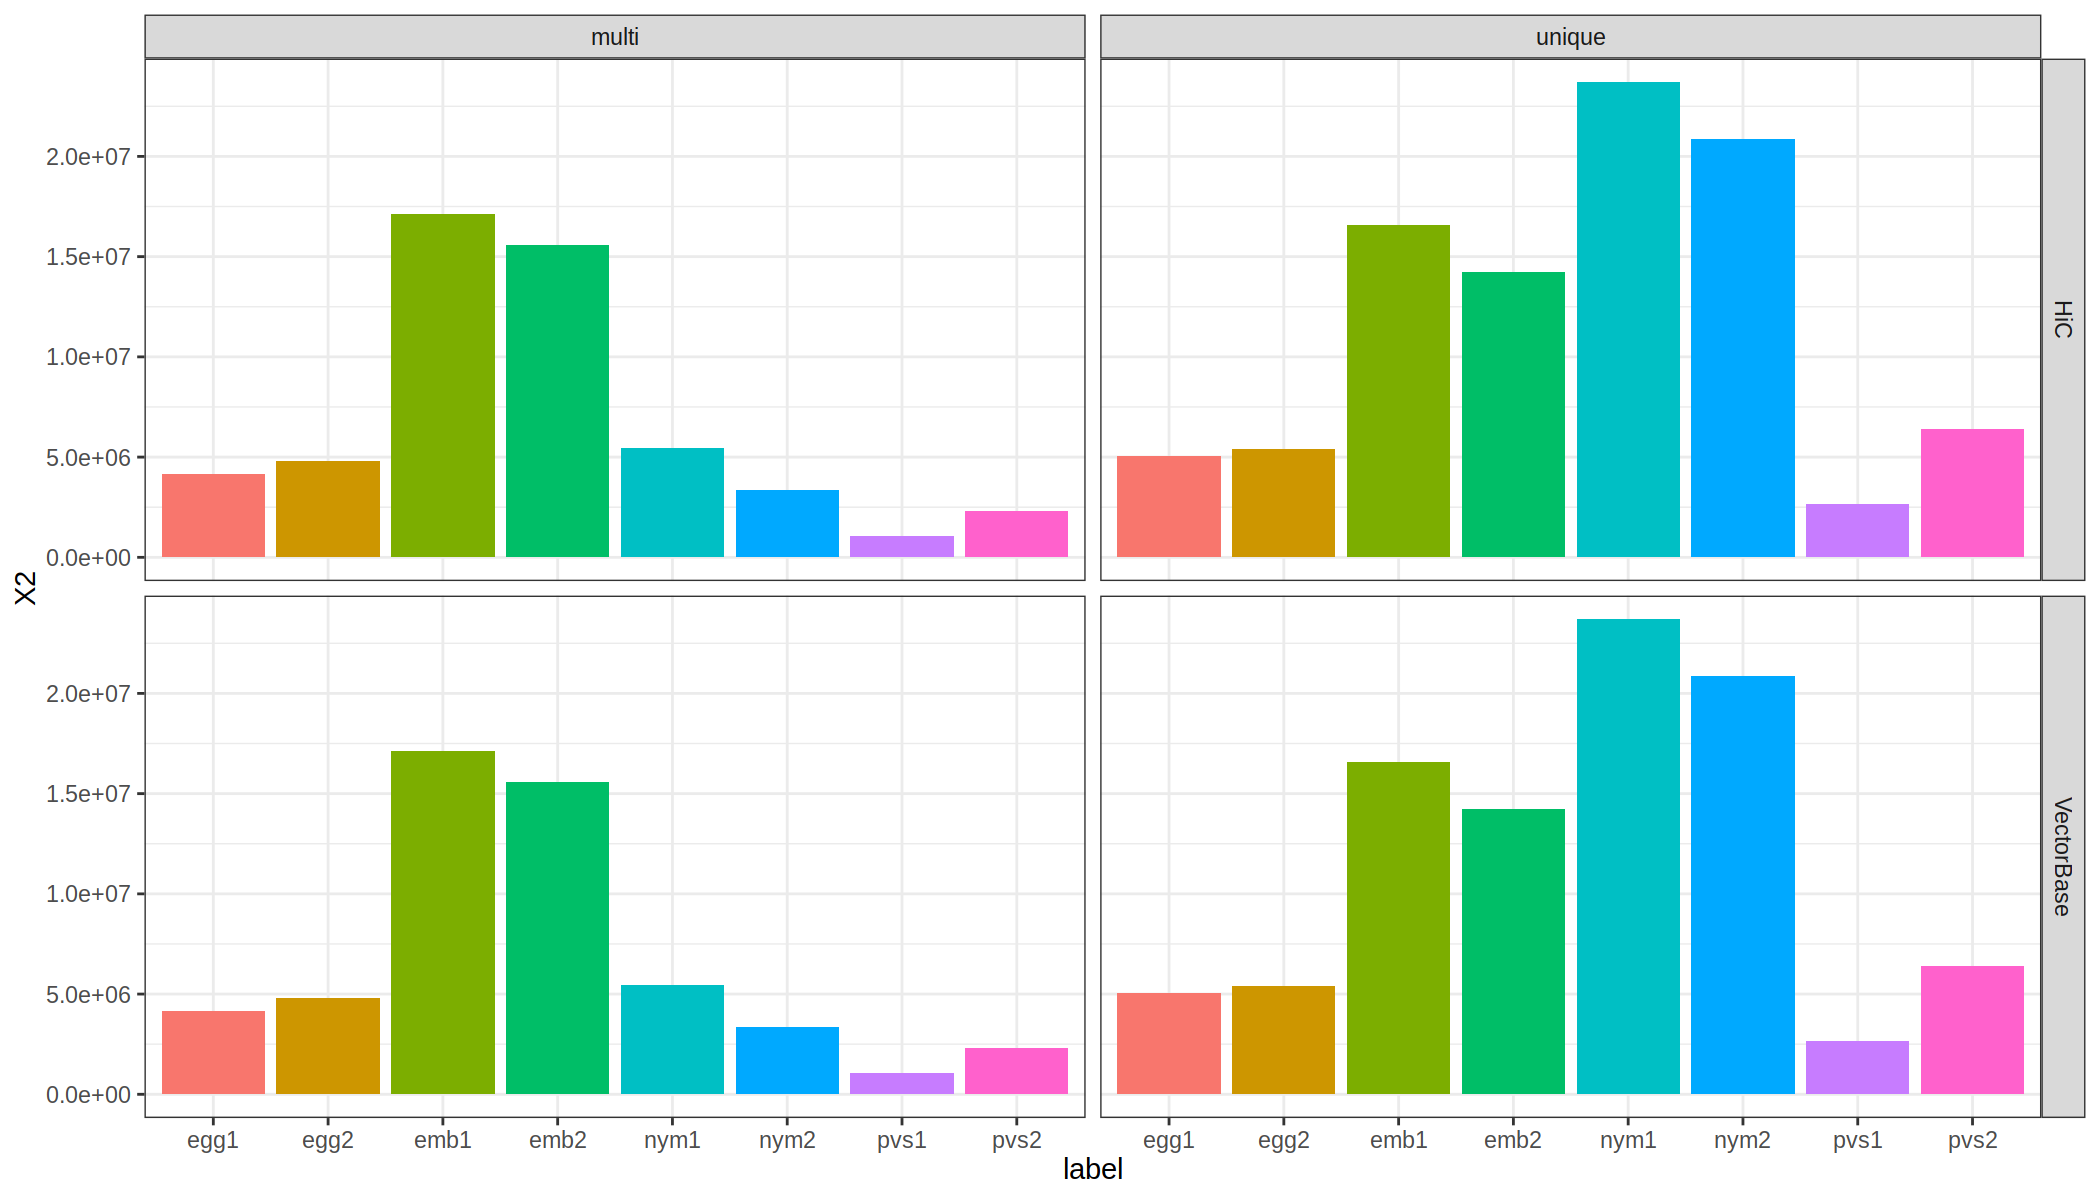

In [33]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 150)
ggplot(all %>% filter(X1 != "total"), aes(label, X2, fill=label)) + 
    geom_col(show.legend=FALSE) + 
    facet_grid(cols=vars(X1), rows=vars(genome)) +
    theme_bw(base_size=14)

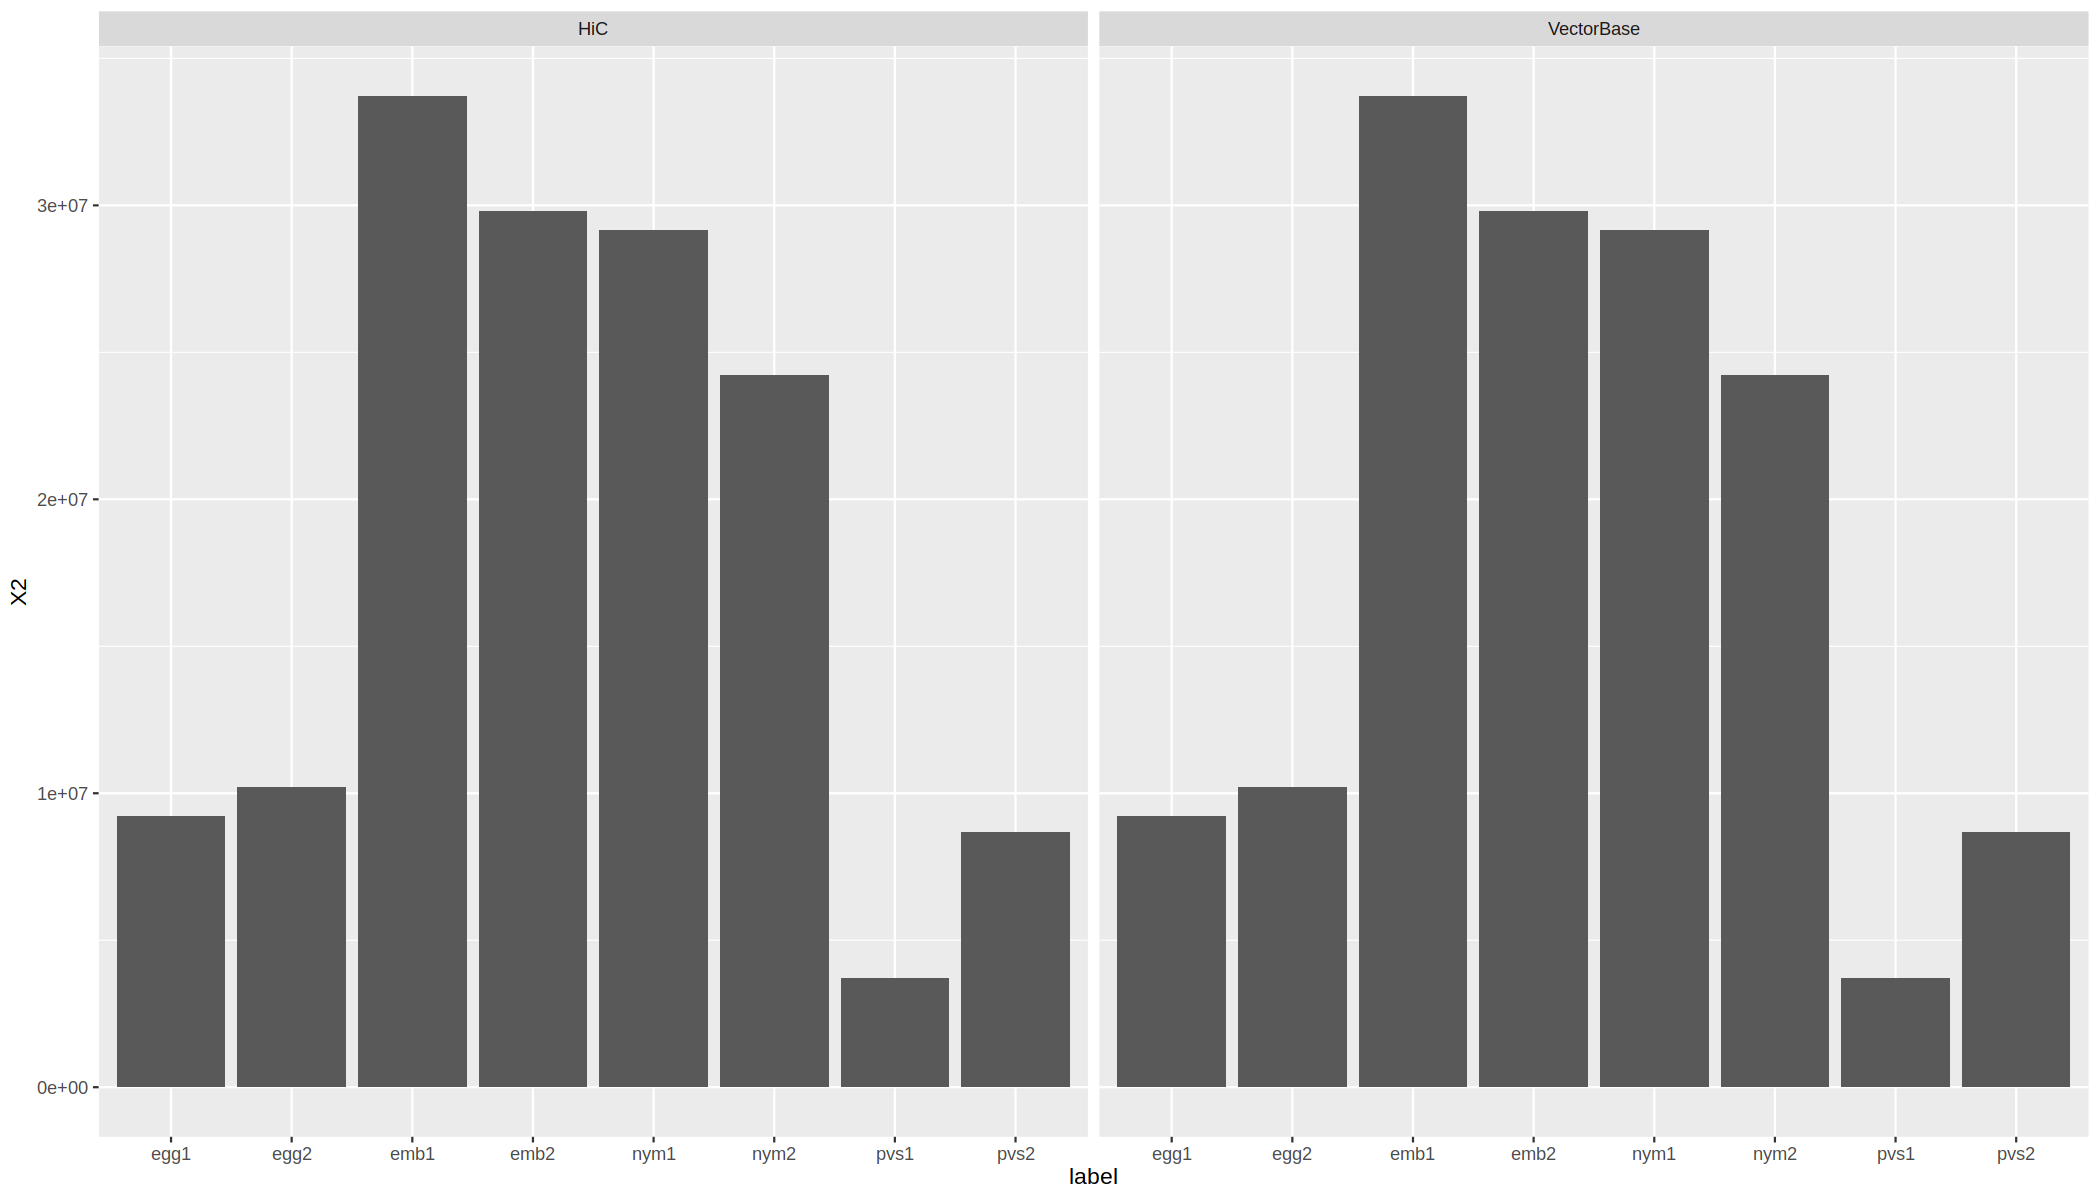

In [34]:
all %>% filter(X1 == "total") %>% ggplot(mapping = aes(label, X2)) + 
    geom_col() + 
    facet_grid(cols=vars(genome))